## 네이버 스포츠 뉴스 웹크롤링 , 워드 클라우드 시각화

In [87]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
# from urllib.parse import quote
# from tqdm import tqdm
# import re, nltk
# from konlpy.tag import Okt 
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

- 네이버 스포츠 뉴스 크롤링

In [88]:
sports = ['kbaseball', 'wbaseball','kfootball','wfootball', 'basketball','volleyball','golf','general']
base_url = 'https://sports.news.naver.com/'
suffix_url= '/news/index?isphoto=N&page='

In [89]:
driver = webdriver.Chrome()
url = f'{base_url}kbaseball{suffix_url}1'
driver.get(url)

In [90]:
# 기사 목록
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [91]:
# 기사 제목
li = lis[0]
title = li.select_one('.title').get_text().strip()
title

'최지훈-박성한 아시안게임 보내는 SSG 김원형 감독 “쫄지 말고 잘 하고 왔으면 좋겠다”'

- 종목별로 몇페이지가 있는지 확인하기

In [92]:
# 10페이지가 넘는 종목 선택
url = f'{base_url}wfootball{suffix_url}1'
driver.get(url)           

In [93]:
# 모든 페이지마다 끝나는 조건을 다음을 눌르고 다음 페이지가 없을 때 까지.
sports_dict ={}
for sport in sports:
    url = f'{base_url}{sport}{suffix_url}1'
    driver.get(url)
    time.sleep(2) 

    next_clicked=0
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:     # 모든 종목의 마지막 페이지가 있는 화면
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            if next_clicked == 0:
                num_pages = len(pages) + 1
            else:
                num_pages = next_clicked * 10 + len(pages)
            sports_dict[sport] = num_pages
            break
        
sports_dict

{'kbaseball': 9,
 'wbaseball': 5,
 'kfootball': 9,
 'wfootball': 15,
 'basketball': 8,
 'volleyball': 5,
 'golf': 3,
 'general': 13}

- 모든 종목, 모든 페이지에서 대해서 타이틀 가져오기

In [94]:
titles = ''
for sport, num_pages in sports_dict.items():
  for page in range(1, num_pages + 1):
      url = f'{base_url}{sport}{suffix_url}{page}'
      driver.get(url)
      time.sleep(2)

      soup = BeautifulSoup(driver.page_source, 'html.parser')
      lis = soup.select('.news_list > ul > li')
      for li in lis:
         titles += li.select_one('.title').get_text().strip() + '\n'

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=117.0.5938.89)
Stacktrace:
	GetHandleVerifier [0x00007FF79A6978A2+54818]
	(No symbol) [0x00007FF79A606AD2]
	(No symbol) [0x00007FF79A4BDA3B]
	(No symbol) [0x00007FF79A49DEE8]
	(No symbol) [0x00007FF79A523237]
	(No symbol) [0x00007FF79A536C6F]
	(No symbol) [0x00007FF79A51E883]
	(No symbol) [0x00007FF79A4F3691]
	(No symbol) [0x00007FF79A4F48D4]
	GetHandleVerifier [0x00007FF79A9FB9A2+3610402]
	GetHandleVerifier [0x00007FF79AA51870+3962352]
	GetHandleVerifier [0x00007FF79AA49D5F+3930847]
	GetHandleVerifier [0x00007FF79A733656+693206]
	(No symbol) [0x00007FF79A611638]
	(No symbol) [0x00007FF79A60D944]
	(No symbol) [0x00007FF79A60DA72]
	(No symbol) [0x00007FF79A5FE123]
	BaseThreadInitThunk [0x00007FFE2AC77614+20]
	RtlUserThreadStart [0x00007FFE2B1626B1+33]


In [ ]:
driver.close()
titles.count('\n')

InvalidSessionIdException: Message: invalid session id
Stacktrace:
	GetHandleVerifier [0x00007FF79A6978A2+54818]
	(No symbol) [0x00007FF79A606AD2]
	(No symbol) [0x00007FF79A4BD8ED]
	(No symbol) [0x00007FF79A4F30DE]
	(No symbol) [0x00007FF79A51E9A2]
	(No symbol) [0x00007FF79A51A710]
	(No symbol) [0x00007FF79A51A016]
	(No symbol) [0x00007FF79A4941D0]
	GetHandleVerifier [0x00007FF79A9FB9A2+3610402]
	GetHandleVerifier [0x00007FF79AA51870+3962352]
	GetHandleVerifier [0x00007FF79AA49D5F+3930847]
	GetHandleVerifier [0x00007FF79A733656+693206]
	(No symbol) [0x00007FF79A611638]
	(No symbol) [0x00007FF79A492FFE]
	GetHandleVerifier [0x00007FF79AA92288+4227080]
	BaseThreadInitThunk [0x00007FFE2AC77614+20]
	RtlUserThreadStart [0x00007FFE2B1626B1+33]


- Word Cloud 만들기

In [95]:
import re, nltk
from konlpy.tag import Okt 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [96]:
okt = Okt()
tokens = okt.nouns(titles)
tokens[:10]

['김원형', '감독', '송영진', '최대', '이닝', '엘리', '아스', '불펜', '대기', '최지훈']

- 사각형 워드 클라우드

In [97]:
news = nltk.Text(tokens, name='스포츠 기사')
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/windows/Fonts/malgun.ttf', relative_scaling=0.4
).generate_from_frequencies(dict(news.vocab().most_common(300)))

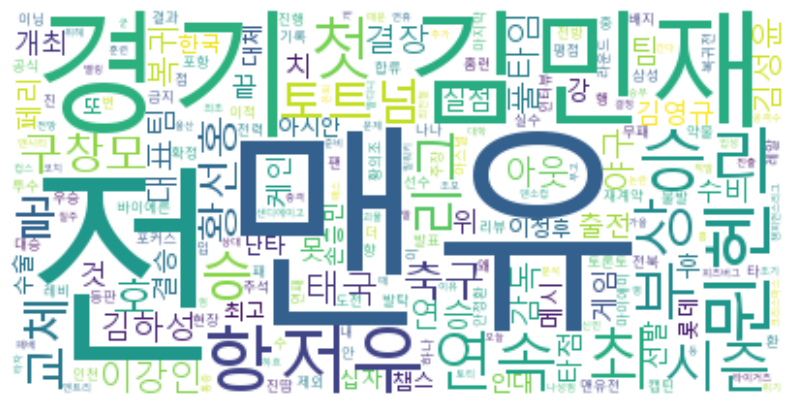

In [99]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

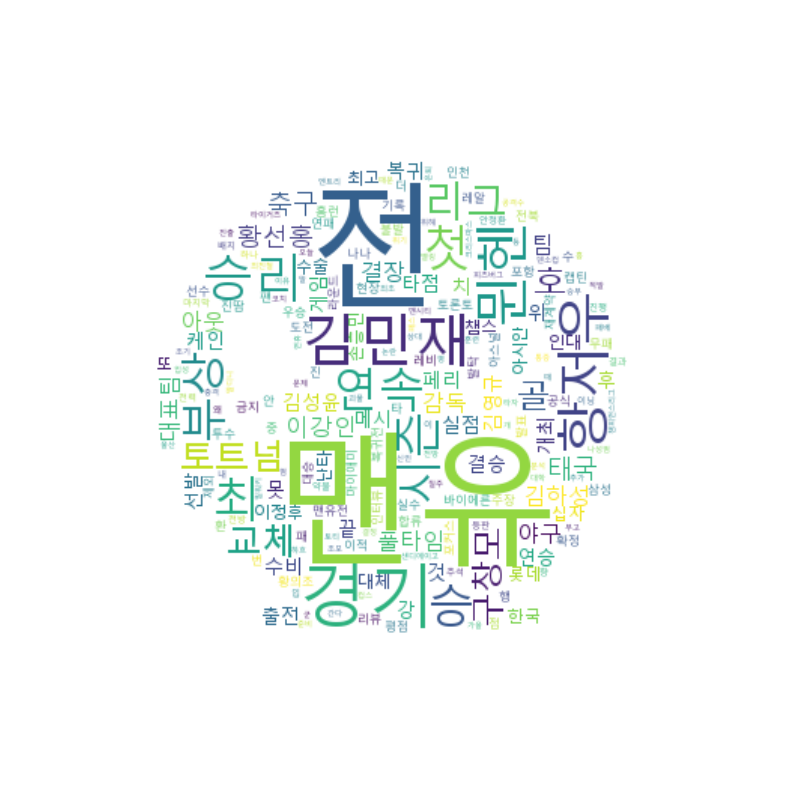

In [105]:
mask = np.array(Image.open('data/ball.jpg'))
wc = WordCloud(
    background_color='white', random_state=2023,
    mask=mask, font_path='C:/Windows/Fonts/malgun.ttf', relative_scaling=0.4
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [107]:
with open('data/네이버 스포츠 뉴스.txt', 'w', encoding='utf-8') as file:
    for answer in titles:
        file.write(answer)